In [1]:
from causalinfo import *
import numpy as np
import pandas as pd
from nxpd import draw

In [2]:
c, s, a, k = make_variables('C S A K', 2)
c
c.assign([.2, .8])

In [3]:
t = pd.DataFrame(columns=['A'], data=['?', '?'])
t.index.names = ['state']
t

,A
state,
0,?
1,?


In [4]:
c

,C
0,0.2
1,0.8


In [5]:
def sameas(vin, vout):
    vout[vin] = 1.0

In [6]:
def double(i1, o1, o2):
    o1[i1] = 1
    o2[i1] = 1

In [7]:
def halfr(in1, in2, out1):
    if in2 == 0:
        out1[in1] = 1
    else:
        out1[:] = .5

In [10]:
p1 = Equation('p1', [c], [s, k], double)
p2 = Equation('p2', [s], [a], sameas)
p3 = Equation('p3', [c, k], [a], halfr)

In [11]:
p3

Equation<p3>

In [21]:
cn = CausalNetwork([p1, p2])

In [10]:
t_see = cn.generate_joint()
t_see

,C,K,S,A,Pr
0,0,0,0,0,0.2
1,1,1,1,1,0.8


In [11]:
t_see.mutual_info(k, a)

0.72192809488736231

In [12]:
k.assign_from_joint(t_see, do=True)

In [16]:
t_do_k = cn.generate_joint()
t_do_k

,C,K,S,A,Pr
0,0,0,0,0,0.04
1,0,1,0,0,0.16
2,1,0,1,1,0.16
3,1,1,1,1,0.64


In [15]:
t_do_k.mutual_info(k, a)

0.0

In [17]:
s.assign_from_joint(t_see, do=True)

In [19]:
cn.reset_interventions()
t_do_s = cn.generate_joint()

In [20]:
t_do_s.mutual_info(s, a)

0.72192809488736231

In [21]:
t_do_s.mutual_info(s, a, c)

0.0

In [22]:
t_do_s

,C,K,S,A,Pr
0,0,0,0,0,0.2
1,1,1,1,1,0.8


In [68]:
cn

In [69]:
cn.players

[Player<p1>, Player<p2>]

In [70]:
cn.ordered_variables

[<C=[ 0.2  0.8]>, <K=[ 0.  1.]>, <S=[ 0.  1.]>, <A=[ 0.  1.]>]

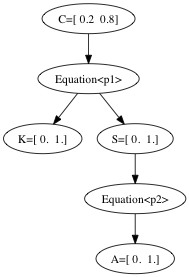

In [23]:
draw(cn.full_network, show='ipynb')

In [100]:
cn.full_network.graph['rankdir'] = 'LR'
cn.full_network.graph['dpi'] = 55
cn.full_network.node[c]['label']='C'
cn.full_network.node[c]['color']='red'

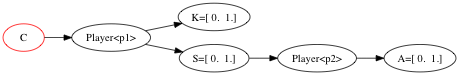

In [101]:
draw(cn.full_network, show='ipynb')

In [80]:
t_do_k.joint(s, k, a)

Pr
S K A      
0 0 0  0.04
  1 0  0.16
1 0 1  0.16
  1 1  0.64

In [78]:
t_do_k.joint(c)

,Pr
C,
0,0.2
1,0.8
